**Section 1:** 

Download, Encode and Split the Penn Treebank dataset.

In [1]:
import sys
import shutil
import urllib

import zipfile
from pathlib import Path
import requests

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from typing import Iterable, List, Callable, Dict
from tqdm import tqdm

np.random.seed(42)

In [2]:
class DownloadProgressBar(tqdm):
    def update_to(self, b=1, bsize=1, tsize=None):
        if tsize is not None:
            self.total = tsize
        self.update(b * bsize - self.n)

def download_dataset(download_path: Path, url: str):
    response = requests.get(url)
    with open(download_path, 'wb') as f:
        f.write(response.content)

def download_url(download_path: Path, url: str):
    print("Downloading dataset...")
    download_url(url=url, download_path=download_path)
    print("Download complete!")

def extract_dataset(download_path: Path, extract_path: Path):
    print("Extracting dataset... (it may take a while...)")
    with zipfile.ZipFile(download_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Extraction completed!")

In [3]:
url = "https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip"
dataset_name = "dependency_treebank"

print(f"Current work directory: {Path.cwd()}")
dataset_folder = Path.cwd().joinpath("Datasets")

if not dataset_folder.exists():
    dataset_folder.mkdir(parents=True)

dataset_zip_path = dataset_folder.joinpath("dependency_treebank.zip")
dataset_path = dataset_folder.joinpath(dataset_name)

if not dataset_zip_path.exists():
    download_dataset(dataset_zip_path, url)

if not dataset_path.exists():
    extract_dataset(dataset_zip_path, dataset_folder)

Current work directory: d:\università\Magistrale\NLP\Tutorial


In [4]:
file_path = dataset_folder.joinpath(dataset_name, "wsj_0199.dp")

if file_path.is_file():
        with file_path.open(mode='r', encoding='utf-8') as text_file:
            text = text_file.read()
            print(text)

Trinity	NNP	3
Industries	NNPS	3
Inc.	NNP	4
said	VBD	0
it	PRP	6
reached	VBD	4
a	DT	9
preliminary	JJ	9
agreement	NN	6
to	TO	11
sell	VB	9
500	CD	14
railcar	NN	14
platforms	NNS	11
to	TO	11
Trailer	NNP	18
Train	NNP	18
Co.	NNP	15
of	IN	18
Chicago	NNP	19
.	.	4

Terms	NNS	2
were	VBD	0
n't	RB	2
disclosed	VBN	2
.	.	2

Trinity	NNP	2
said	VBD	0
it	PRP	4
plans	VBZ	2
to	TO	6
begin	VB	4
delivery	NN	6
in	IN	6
the	DT	11
first	JJ	11
quarter	NN	8
of	IN	11
next	JJ	14
year	NN	12
.	.	2



In [5]:
folder = dataset_folder.joinpath(dataset_name)
folder

WindowsPath('d:/università/Magistrale/NLP/Tutorial/Datasets/dependency_treebank')

In [27]:
# Initialize an empty list to store the data rows
dataframe_rows = []
index = 0
# Iterate through the files in the directory with the '.dp' extension
for file_path in folder.glob('*.dp'):
#file_path = folder.joinpath('wsj_0001.dp')
    with file_path.open(mode='r', encoding='utf-8') as text_file:
        index+=1
        sentence =  '' # word1 + word2
        tag = []
        lines = text_file.readlines()
        # Split the line by whitespace to separate columns
        for line in lines:
            line_parts = line.split('\t')
            if len(line_parts) == 1: #case '\n' 
                dataframe_row = {
                    "sentence": sentence,
                    "POS": tag,
                    "index": index,
                    "split": 'train' if index <=100 else  'validation' if index<=150 else 'test'  
                }
                dataframe_rows.append(dataframe_row)
                sentence =  ''
                tag = []
            else:
                sentence += line_parts[0] + " "
                tag.append(line_parts[1])
        # Last sentence
        dataframe_row = {
                    "sentence": sentence,
                    "POS": tag,
                    "index": index,
                    "split": 'train' if index <=100 else  'validation' if index<=150 else 'test' 
                }
        dataframe_rows.append(dataframe_row)
# Create a Pandas DataFrame
df = pd.DataFrame(dataframe_rows)
df.to_pickle(folder.with_name(dataset_name + ".pkl"))

In [29]:
for file_path in folder.glob('*.dp'):
     with file_path.open(mode='r', encoding='utf-8') as text_file:
        print(text_file.read())

Pierre	NNP	2
Vinken	NNP	8
,	,	2
61	CD	5
years	NNS	6
old	JJ	2
,	,	2
will	MD	0
join	VB	8
the	DT	11
board	NN	9
as	IN	9
a	DT	15
nonexecutive	JJ	15
director	NN	12
Nov.	NNP	9
29	CD	16
.	.	8

Mr.	NNP	2
Vinken	NNP	3
is	VBZ	0
chairman	NN	3
of	IN	4
Elsevier	NNP	7
N.V.	NNP	12
,	,	12
the	DT	12
Dutch	NNP	12
publishing	VBG	12
group	NN	5
.	.	3

Rudolph	NNP	2
Agnew	NNP	16
,	,	2
55	CD	5
years	NNS	6
old	JJ	2
and	CC	6
former	JJ	9
chairman	NN	6
of	IN	9
Consolidated	NNP	14
Gold	NNP	14
Fields	NNP	14
PLC	NNP	10
,	,	2
was	VBD	0
named	VBN	16
a	DT	20
nonexecutive	JJ	20
director	NN	17
of	IN	20
this	DT	25
British	JJ	25
industrial	JJ	25
conglomerate	NN	21
.	.	16

A	DT	2
form	NN	12
of	IN	2
asbestos	NN	3
once	RB	6
used	VBN	2
to	TO	8
make	VB	6
Kent	NNP	11
cigarette	NN	11
filters	NNS	8
has	VBZ	35
caused	VBN	12
a	DT	16
high	JJ	16
percentage	NN	13
of	IN	16
cancer	NN	19
deaths	NNS	17
among	IN	16
a	DT	22
group	NN	20
of	IN	22
workers	NNS	23
exposed	VBN	24
to	TO	25
it	PRP	26
more	RBR	29
than	IN	31
30	CD	29
years	NNS	32
ago	

## Check if all tags are present in the dictionary

In [30]:
# Define the Penn Treebank POS Tagset with integers as keys and tags as values
penn_treebank_pos = {
    1: "#",
    2: "$",
    3: "''",
    4: "(",
    5: ")",
    6: ",",
    7: ".",
    8: ":",
    9: "CC",
    10: "CD",
    11: "DT",
    12: "EX",
    13: "FW",
    14: "IN",
    15: "JJ",
    16: "JJR",
    17: "JJS",
    18: "LS",
    19: "MD",
    20: "NN",
    21: "NNS",
    22: "NNP",
    23: "NNPS",
    24: "PDT",
    25: "POS",
    26: "PRP",
    27: "PRP$",
    28: "RB",
    29: "RBR",
    30: "RBS",
    31: "RP",
    32: "SYM",
    33: "TO",
    34: "UH",
    35: "VB",
    36: "VBD",
    37: "VBG",
    38: "VBN",
    39: "VBP",
    40: "VBZ",
    41: "WDT",
    42: "WP",
    43: "WP$",
    44: "WRB"
}
# Example usage:
print(penn_treebank_pos[20])  # Output: NN
print(penn_treebank_pos[40])  # Output: VBZ

# Define the Penn Treebank POS Tagset with tags as keys and integers as values
penn_treebank_pos = {
    '#': 1,
    '$': 2,
    "''": 3,
    '(': 4,
    ')': 5,
    ',': 6,
    '.': 7,
    ':': 8,
    'CC': 9,
    'CD': 10,
    'DT': 11,
    'EX': 12,
    'FW': 13,
    'IN': 14,
    'JJ': 15,
    'JJR': 16,
    'JJS': 17,
    'LS': 18,
    'MD': 19,
    'NN': 20,
    'NNS': 21,
    'NNP': 22,
    'NNPS': 23,
    'PDT': 24,
    'POS': 25,
    'PRP': 26,
    'PRP$': 27,
    'RB': 28,
    'RBR': 29,
    'RBS': 30,
    'RP': 31,
    'SYM': 32,
    'TO': 33,
    'UH': 34,
    'VB': 35,
    'VBD': 36,
    'VBG': 37,
    'VBN': 38,
    'VBP': 39,
    'VBZ': 40,
    'WDT': 41,
    'WP': 42,
    'WP$': 43,
    'WRB': 44
}

NN
VBZ


## Use txt with all the files to inspect words and tags frequecies

In [32]:
print("Distribution of words: ")
print(df['sentence'].value_counts())
print()

Distribution of words: 
Terms were n't disclosed .                                                                                                                                                                                                                    8
In other commodity markets yesterday :                                                                                                                                                                                                        2
Who 's telling the truth ?                                                                                                                                                                                                                    2
Fees 1 3\/4 .                                                                                                                                                                                                                                 2
Source : Telerat

In [874]:
print("Distribution of Splits: ")
print(df['Split'].value_counts())
print()

Distribution of Splits: 
Split
train    47356
valid    31183
test     15545
Name: count, dtype: int64



In [875]:
print("Distribution of Words in split: ")
print(df.groupby(['Split','Word']).size())
print()

Distribution of Words in split: 
Split  Word              
test   $                     208
       %                      78
       &                      13
       '                       9
       ''                     69
                            ... 
valid  your                   11
       yourself                2
       yttrium-containing      1
       zero                    1
       zip                     1
Length: 17524, dtype: int64



In [876]:
print("Distribution of POS in split:")
print(df.groupby(['Split','POS']).size())
print()

Distribution of POS in split:
Split  POS  
test   $        209
       ''        70
       ,        787
       -LRB-     18
       -RRB-     18
               ... 
valid  WDT      157
       WP        80
       WP$        4
       WRB       62
       ``       230
Length: 129, dtype: int64



In [877]:
print("Differences among POS tags in the splits: ")
print(df.groupby(['Word','POS','Split']).size())
print()

Differences among POS tags in the splits: 
Word    POS  Split
!       .    train      3
             valid      3
#       #    train      1
             valid     15
$       $    test     208
                     ... 
zero    CD   valid      1
zinc    NN   test       1
zip     VB   valid      1
zone    NN   train      2
zoomed  VBN  train      1
Length: 19108, dtype: int64



**Section 2:**

Visualization and some first information on the data set.

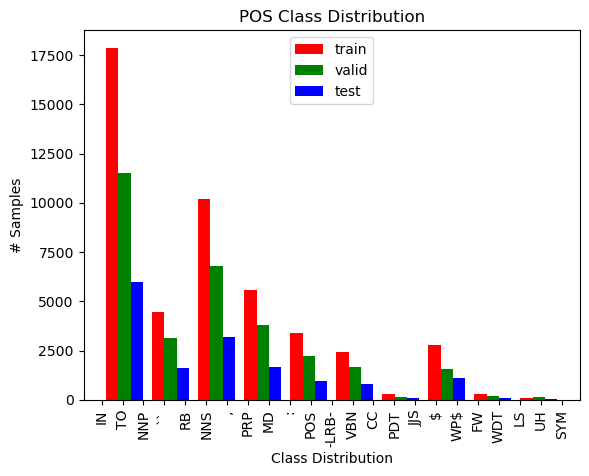

In [878]:
train_pos = df[df.Split == 'train'].POS.values
valid_pos = df[df.Split == 'valid'].POS.values
test_pos = df[df.Split == 'test'].POS.values

plt.hist([train_pos, valid_pos, test_pos], bins=10, label=['train', 'valid', 'test'], color=["red", "green", "blue"], align="mid")
plt.legend(loc='upper center')
plt.title('POS Class Distribution')
plt.xlabel('Class Distribution')
plt.ylabel('# Samples')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
plt.show()

In [879]:
from collections import Counter
train_word = df[df.Split == 'train'].Word.values
valid_word = df[df.Split == 'valid'].Word.values
test_word = df[df.Split == 'test'].Word.values


train_word_counts = Counter(train_word)
valid_word_counts = Counter(valid_word)
test_word_counts = Counter(test_word)

N = 20

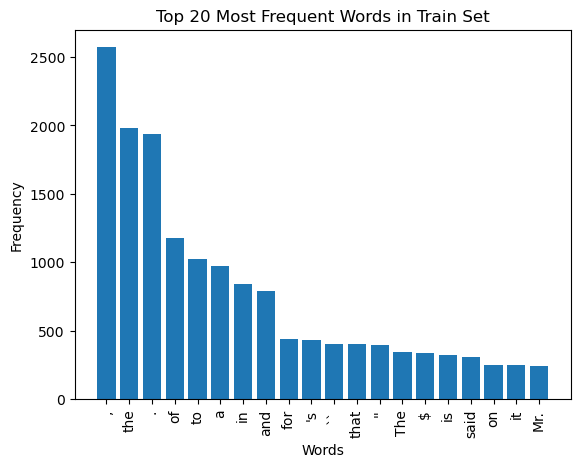

In [880]:
top_words_train = [word for word, _ in train_word_counts.most_common(N)]
word_counts_train = [train_word_counts[word] for word in top_words_train]

plt.bar(top_words_train, word_counts_train)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words in Train Set'.format(N))
plt.show()

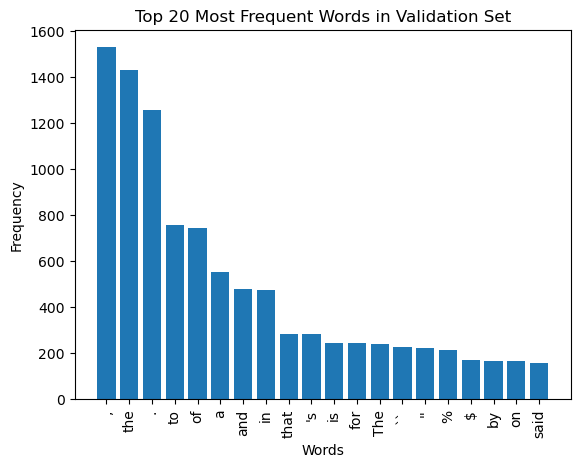

In [881]:
top_words_valid = [word for word, _ in valid_word_counts.most_common(N)]
word_counts_valid = [valid_word_counts[word] for word in top_words_valid]

plt.bar(top_words_valid, word_counts_valid)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words in Validation Set'.format(N))
plt.show()

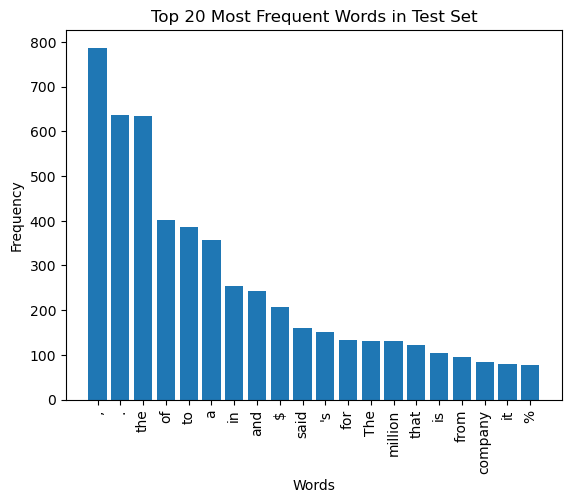

In [882]:
top_words_test = [word for word, _ in test_word_counts.most_common(N)]
word_counts_test = [test_word_counts[word] for word in top_words_test]

plt.bar(top_words_test, word_counts_test)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words in Test Set'.format(N))
plt.show()

**Section 2:**

Text pre-processing, Lemmatization, (Stemming ?)

In [34]:
import re
from functools import reduce
import nltk
from nltk.corpus import stopwords

"""
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@]') #  all non-punctuation symbols are set to whites
GOOD_SYMBOLS_RE = re.compile('[^0-9a-z]') # all non-alphanumeric symbols set to empty string
try:
    STOPWORDS = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    STOPWORDS = set(stopwords.words('english'))
"""

"\nREPLACE_BY_SPACE_RE = re.compile('[/(){}\\[\\]\\|@]') #  all non-punctuation symbols are set to whites\nGOOD_SYMBOLS_RE = re.compile('[^0-9a-z]') # all non-alphanumeric symbols set to empty string\ntry:\n    STOPWORDS = set(stopwords.words('english'))\nexcept LookupError:\n    nltk.download('stopwords')\n    STOPWORDS = set(stopwords.words('english'))\n"

In [61]:
def lower(text: str) -> str:
    return text.lower() # lower casing words

PREPROCESSING_PIPELINE = [
                          lower
                        ]

def text_prepare(text: str,
                 filter_methods: List[Callable[[str], str]] = None) -> str:
    """
    Applies a list of pre-processing functions in sequence (reduce).
    Note that the order is important here!
    """
    filter_methods = filter_methods if filter_methods is not None else PREPROCESSING_PIPELINE
    return reduce(lambda txt, f: f(txt), filter_methods, text)

In [62]:
df['sentence'] = df['sentence'].apply(lambda txt: text_prepare(txt))
print(f'[Debug] After:\n{df.sentence.values[50]}')
print()

[Debug] After:
j.p. bolduc , vice chairman of w.r. grace & co. , which holds a 83.4 % interest in this energy-services company , was elected a director . 



**Section 4**

Vocabulary Creation

In [63]:
from collections import OrderedDict
def build_vocabulary(df: pd.DataFrame) -> (Dict[int, str], 
                                           Dict[str, int],
                                           List[str]): # builds the vocabulary of the dataset

    idx_to_word = OrderedDict() # vocabulary index to word map
    word_to_idx = OrderedDict() # word to vocabulary index map (inverse of idx_to_word)

    curr_idx = 0
    for sentence in tqdm(df.sentence.values):
        tokens = sentence.split()
        for token in tokens:
            if token not in word_to_idx:
                word_to_idx[token] = curr_idx
                idx_to_word[curr_idx] = token
                curr_idx += 1

    word_listing = list(idx_to_word.values()) # set of unique terms that make up the vocabulary
    return idx_to_word, word_to_idx, word_listing

In [64]:
idx_to_word, word_to_idx, word_listing = build_vocabulary(df)
print(f'[Debug] Index -> Word vocabulary size: {len(idx_to_word)}')
print(f'[Debug] Word -> Index vocabulary size: {len(word_to_idx)}')
print(f'[Debug] Some words: {[(idx_to_word[idx], idx) for idx in np.arange(10) + 1]}')

100%|██████████| 3914/3914 [00:00<00:00, 279644.08it/s]

[Debug] Index -> Word vocabulary size: 10947
[Debug] Word -> Index vocabulary size: 10947
[Debug] Some words: [('vinken', 1), (',', 2), ('61', 3), ('years', 4), ('old', 5), ('will', 6), ('join', 7), ('the', 8), ('board', 9), ('as', 10)]


In [65]:
# Check size, content, consistency and toy example
def evaluate_vocabulary(idx_to_word: Dict[int, str], word_to_idx: Dict[str, int],
                        word_listing: List[str], df: pd.DataFrame, check_default_size: bool = False):
    print("[Vocabulary Evaluation] Size checking...")
    assert len(idx_to_word) == len(word_to_idx)
    assert len(idx_to_word) == len(word_listing)

    print("[Vocabulary Evaluation] Content checking...")
    for i in tqdm(range(0, len(idx_to_word))):
        assert idx_to_word[i] in word_to_idx
        assert word_to_idx[idx_to_word[i]] == i

    print("[Vocabulary Evaluation] Consistency checking...")
    _, _, first_word_listing = build_vocabulary(df)
    _, _, second_word_listing = build_vocabulary(df)
    assert first_word_listing == second_word_listing

    print("[Vocabulary Evaluation] Toy example checking...")
    toy_df = pd.DataFrame.from_dict({
        'sentence': ["all that glitters is not gold", "all in all i like this assignment"]
    })
    _, _, toy_word_listing = build_vocabulary(toy_df)
    toy_valid_vocabulary = set(' '.join(toy_df.sentence.values).split())
    assert set(toy_word_listing) == toy_valid_vocabulary

In [66]:
print("Vocabulary evaluation...")
evaluate_vocabulary(idx_to_word, word_to_idx, word_listing, df)
print("Evaluation completed!")

Vocabulary evaluation...
[Vocabulary Evaluation] Size checking...
[Vocabulary Evaluation] Content checking...


100%|██████████| 10947/10947 [00:00<00:00, 2189663.12it/s]


[Vocabulary Evaluation] Consistency checking...


100%|██████████| 3914/3914 [00:00<00:00, 301236.87it/s]


[Vocabulary Evaluation] Toy example checking...


100%|██████████| 2/2 [00:00<00:00, 2001.10it/s]

Evaluation completed!


In [67]:
import simplejson as sj

vocab_path = Path.cwd().joinpath('Datasets', "dependency_treebank", 'vocab.json')

print(f"Saving vocabulary to {vocab_path}")
with vocab_path.open(mode='w') as f:
    sj.dump(word_to_idx, f, indent=4)
print("Saving completed!")

Saving vocabulary to d:\università\Magistrale\NLP\Tutorial\Datasets\dependency_treebank\vocab.json
Saving completed!


**Section 5:**

GloVe Embedding

In [894]:
# Concatenate the DataFrames into one DataFrame
trainvalid_df = pd.concat([train_df, valid_df], ignore_index=True)

# Define the GloVe Embeddings
def load_glove_vectors(file_path):
    glove_vectors = {}
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split()
            word = parts[0]
            vector = [float(val) for val in parts[1:]]
            glove_vectors[word] = vector
    return glove_vectors

glove_file = '/Users/antoniospantelis/Desktop/Assignment 1/glove.6B.100d.txt'  
glove_vectors = load_glove_vectors(glove_file)

In [47]:
import gensim
import gensim.downloader as gloader

def load_embedding_model(embedding_dimension: int = 50) -> gensim.models.keyedvectors.KeyedVectors:  #50,100,200
    download_path = "glove-wiki-gigaword-{}".format(embedding_dimension)   
    try:
        emb_model = gloader.load(download_path)
    except ValueError as e:
        print("Glove: 50, 100, 200, 300")
        raise e
    return emb_model

In [72]:
embedding_dimension = 100
embedding_model = load_embedding_model(embedding_dimension=embedding_dimension)

In [58]:
def check_OOV_terms(embedding_model: gensim.models.keyedvectors.KeyedVectors,
                    word_listing: List[str]):
    """
    Checks differences between pre-trained embedding model vocabulary
    and dataset specific vocabulary in order to highlight out-of-vocabulary terms.

    :param embedding_model: pre-trained word embedding model (gensim wrapper)
    :param word_listing: dataset specific vocabulary (list)

    :return
        - list of OOV terms
    """
    embedding_vocabulary = set(embedding_model.key_to_index.keys())
    oov = set(word_listing).difference(embedding_vocabulary)
    return list(oov)

In [73]:
oov_terms = check_OOV_terms(embedding_model, word_listing)
oov_percentage = float(len(oov_terms)) * 100 / len(word_listing)
print(f"Total OOV terms: {len(oov_terms)} ({oov_percentage:.2f}%)")

Total OOV terms: 676 (6.18%)


In [69]:
print(oov_terms)

['food-industry', 'erbamont', 'vinken', 'samnick', '7.272', 'year-earlier', '415.8', 'school-board', 'government-certified', 'higher-salaried', 'long-tenured', 'yttrium-containing', '3.253', 'rexinger', 'housing-assistance', 'money-fund', 'mortgage-based', 'recession-inspired', 'dollar-yen', 'ariail', 'citizen-sparked', 'million-a-year', 'eight-count', 'chilver', 'arighi', '566.54', 'heiwado', '16.125', 'ac-130u', 'flim-flammery', 'state-supervised', 'auto-safety', 'macheski', 'change-ringing', 'copper-rich', 'johnson-era', 'prevalance', 'retin-a', 'sell-offs', 'free-enterprise', 'deposits-a', 'automotive-parts', 'derchin', 'subskill', 'rey\\/fawcett', 'sub-segments', 'rubinfien', 'chinchon', 'wheeland', 'clean-air', 'contingency-fee', 'electrical-safety', '14,821', 'unfair-trade', '319.75', '87-store', 'pre-1917', 'beer-belly', "creator's", 'sub-markets', 'rope-sight', 'durable-goods', 'achievement-test', 'nipponese', '71,309', '236.79', 'anti-morning-sickness', 'high-rate', 'capital-

## We can also try to assign 0 vector to all OOV

In [70]:
def build_embedding_matrix(embedding_model: gensim.models.keyedvectors.KeyedVectors,
                           embedding_dimension: int,
                           word_to_idx: Dict[str, int],
                           vocab_size: int,
                           oov_terms: List[str]) -> np.ndarray:
    """
    Builds the embedding matrix of a specific dataset given a pre-trained word embedding model

    :param embedding_model: pre-trained word embedding model (gensim wrapper)
    :param word_to_idx: vocabulary map (word -> index) (dict)
    :param vocab_size: size of the vocabulary
    :param oov_terms: list of OOV terms (list)

    :return
        - embedding matrix that assigns a high dimensional vector to each word in the dataset specific vocabulary (shape |V| x d)
    """
    embedding_matrix = np.zeros((vocab_size, embedding_dimension), dtype=np.float32)
    for word, idx in tqdm(word_to_idx.items()):
        try:
            embedding_vector = embedding_model[word]
        except (KeyError, TypeError):
            embedding_vector = np.random.uniform(low=-0.05, high=0.05, size=embedding_dimension)

        embedding_matrix[idx] = embedding_vector

    return embedding_matrix

In [74]:
# Testing
embedding_matrix = build_embedding_matrix(embedding_model, embedding_dimension, word_to_idx, len(word_to_idx), oov_terms)
print(f"Embedding matrix shape: {embedding_matrix.shape}")

100%|██████████| 10947/10947 [00:00<00:00, 40567.37it/s]

Embedding matrix shape: (10947, 100)


**Section 3:**

Definition of the baseline (Bidirectional LSTM with a dense layer), the 1st model (one additional LSTM layer) and the 2nd model (one additional dense layer).

In [78]:
!python -m pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 57.5

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [79]:
!python -m pip install keras

## To-Do
- one hot encoding or similar for the POS
- padding of the sequences 
- understand how to pass inputs to the net

In [76]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense

# Define the model
baseline_model = Sequential(name='Baseline')

max_sentence_length = max(trainvalid_df['Word'].apply(len))

# Input shape should match the shape of your input sequences (e.g., word embeddings)
input_shape = (max_sentence_length, embedding_dim)

# Add Bidirectional LSTM layer
baseline_model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=input_shape,name='bidirectional_LSTM'))

unique_pos = trainvalid_df['POS'].explode().unique()
num_pos = len(unique_pos) # The number of unique POS tags

# The number of units in the Dense layer should match the number of classes or labels in your task
baseline_model.add(Dense(num_pos, activation='softmax',name='Dense_layer'))

baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
baseline_model.summary()


ModuleNotFoundError: No module named 'tensorflow'

In [900]:
# Copy the baseline_model
model_1 = tf.keras.models.clone_model(baseline_model)
model_1.build((None, max_sentence_length, embedding_dim))  # Build the model to set input shape

model_1._name = 'Model_1'

# Add one additional LSTM layer
model_1.add(LSTM(32, return_sequences=True, name='additional_LSTM'))

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_1.summary()


Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_LSTM (Bidire  (None, 24, 128)           84480     
 ctional)                                                        
                                                                 
 Dense_layer (Dense)         (None, 24, 45)            5805      
                                                                 
 additional_LSTM (LSTM)      (None, 24, 32)            9984      
                                                                 
Total params: 100269 (391.68 KB)
Trainable params: 100269 (391.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [901]:
model_2 = tf.keras.models.clone_model(baseline_model)
model_2._name = 'Model_2'

# Add one additional dense layer
model_2.add(Dense(64, activation='relu', name='additional_Dense_layer'))

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.summary()


Model: "Model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_LSTM (Bidire  (None, 24, 128)           84480     
 ctional)                                                        
                                                                 
 Dense_layer (Dense)         (None, 24, 45)            5805      
                                                                 
 additional_Dense_layer (De  (None, 24, 64)            2944      
 nse)                                                            
                                                                 
Total params: 93229 (364.18 KB)
Trainable params: 93229 (364.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Section 7:**

Definition of the evaluation metrics for comparison.